# Modification effectuées sur les fichiers csv train full et test

## étapes : 
    - Récupération des fichiers csv depuis kaggle.
    - Changement des valeurs nan de la colonne 'NumberOfDependents' en 0.
    - Création de la colonne 'NumberOfTimes30DaysOrLater'.
    - Agrégation des colonnes 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse' et 'NumberOfTimes90DaysLate' afin de remplir la colonne 'NumberOfTimes30DaysOrLater'.
    - Suppression des trois colonnes ayant servies à l'agrégation.
    - Insertion de la colonne 'IsOld'.
    - Remplissage de la colonne 'IsOld'.
    - Transformation des valeurs anomalies de la colonne 'NumberOfTimes30DaysOrLater'.
    - Changement de nom pour la colonne field1 vers Id.

### Récupération des fichiers csv depuis kaggle

In [1]:
# importation de pandas

from pandas import read_csv
import numpy as np

# insertion du fichier csv train dans un dataframe

df_train_full = read_csv( 'https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-train.csv' )
df_test = read_csv('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-test.csv')

## mise en pratique du livre 

In [2]:
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy 
print('numpy: {}'.format(numpy.__version__))
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__)) 
import pandas 
print('pandas: {}'.format(pandas.__version__))
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))

scipy: 1.3.1
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


In [3]:
# View first 20 rows 
from pandas import read_csv 
from matplotlib import pyplot

peek = df_train_full.head(20)
print(peek)
# description
description = df_train_full.describe() 
print(description)
# effectif des classes
class_counts = df_train_full.groupby('SeriousDlqin2yrs').size() 
print(class_counts)
# corrélation
correlations = df_train_full.corr(method='pearson') 
print(correlations)
# erreur
skew = df_train_full.skew() 
print(skew)

    Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
0            1                              0.766127   45   
1            2                              0.957151   40   
2            3                              0.658180   38   
3            4                              0.233810   30   
4            5                              0.907239   49   
5            6                              0.213179   74   
6            7                              0.305682   57   
7            8                              0.754464   39   
8            9                              0.116951   27   
9           10                              0.189169   57   
10          11                              0.644226   30   
11          12                              0.018798   51   
12          13                              0.010352   46   
13          14                              0.964673   40   
14          15                              0.019657   76   
15          16          

                                      Unnamed: 0  \
Unnamed: 0                              1.000000   
RevolvingUtilizationOfUnsecuredLines    0.002372   
age                                     0.004403   
NumberOfTime30-59DaysPastDueNotWorse   -0.000571   
DebtRatio                              -0.002906   
MonthlyIncome                           0.002632   
NumberOfOpenCreditLinesAndLoans         0.004586   
NumberOfTimes90DaysLate                -0.001104   
NumberRealEstateLoansOrLines           -0.000666   
NumberOfTime60-89DaysPastDueNotWorse   -0.000777   
NumberOfDependents                     -0.000055   
SeriousDlqin2yrs                        0.002801   

                                      RevolvingUtilizationOfUnsecuredLines  \
Unnamed: 0                                                        0.002372   
RevolvingUtilizationOfUnsecuredLines                              1.000000   
age                                                              -0.005898   
NumberOfTim

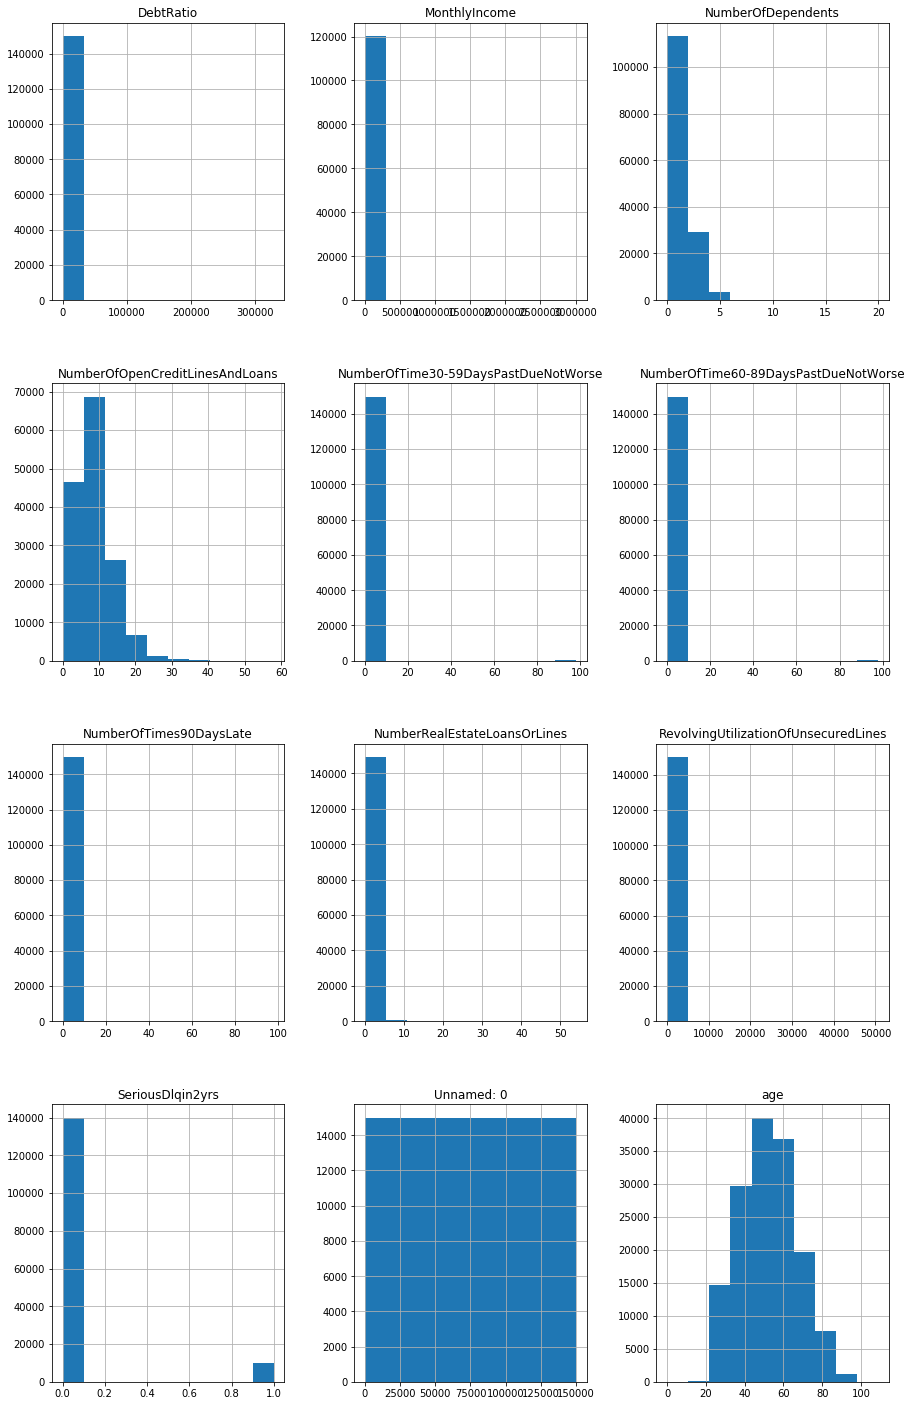

In [4]:
# histogramme
df_train_full.hist(figsize=(15,25))
pyplot.show()

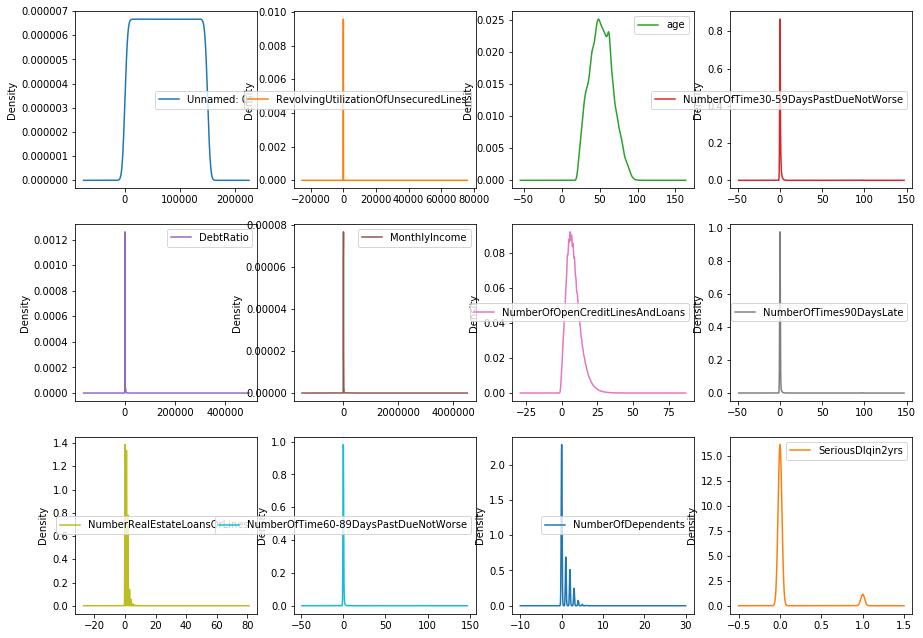

In [5]:
# density plot
df_train_full.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,15)) 
pyplot.show()

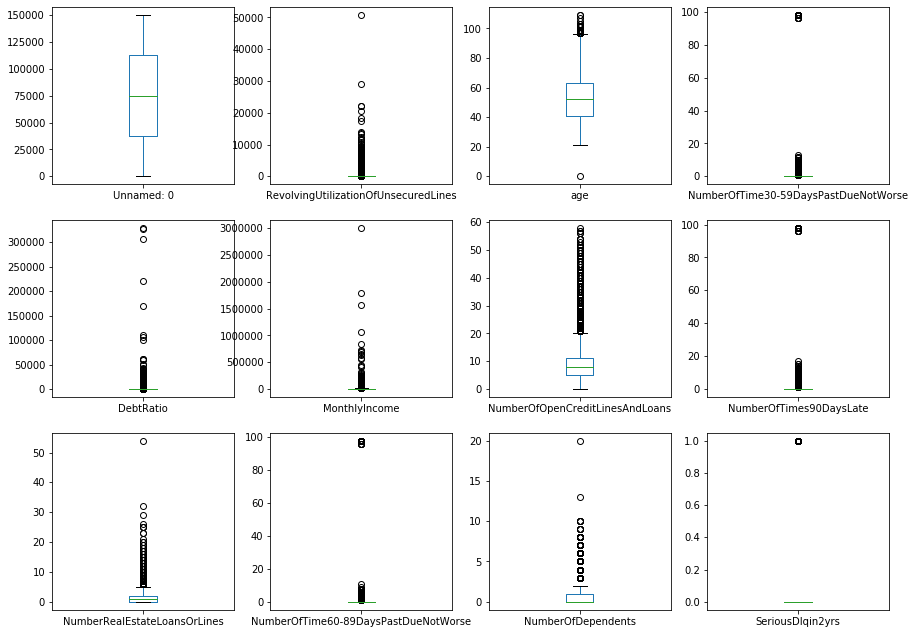

In [6]:
# boxplot
df_train_full.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15)) 
pyplot.show()

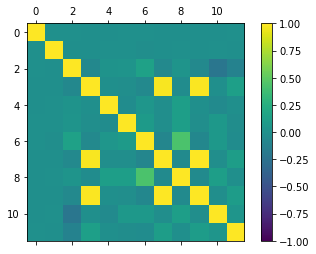

In [7]:
# matrice de corrélation
import numpy
correlations = df_train_full.corr() 
# plot correlation matrix 
fig = pyplot.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin=-1, vmax=1) 
fig.colorbar(cax) 
pyplot.show()

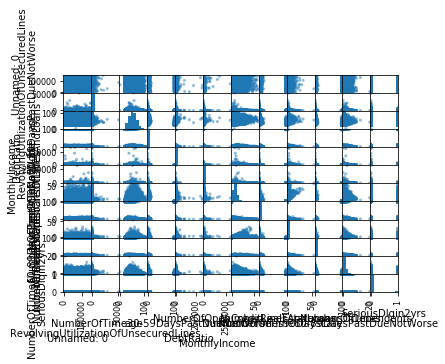

In [8]:
# nuage de point
from pandas.plotting import scatter_matrix 
scatter_matrix(df_train_full) 
pyplot.show()

In [9]:
from numpy import set_printoptions 
from sklearn.preprocessing import MinMaxScaler
# rescale data
array = df_train_full.values 
# separate array into input and output components 
X = array[:,0:8] 
Y = array[:,8] 
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(X) 
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX[0:5,:])

[[0.000e+00 1.511e-05 4.128e-01 2.041e-02 2.436e-06 3.031e-03 2.241e-01
  0.000e+00]
 [6.667e-06 1.888e-05 3.670e-01 0.000e+00 3.697e-07 8.641e-04 6.897e-02
  0.000e+00]
 [1.333e-05 1.298e-05 3.486e-01 1.020e-02 2.582e-07 1.011e-03 3.448e-02
  1.020e-02]
 [2.000e-05 4.611e-06 2.752e-01 0.000e+00 1.094e-07 1.097e-03 8.621e-02
  0.000e+00]
 [2.667e-05 1.789e-05 4.495e-01 1.020e-02 7.561e-08 2.113e-02 1.207e-01
  0.000e+00]]


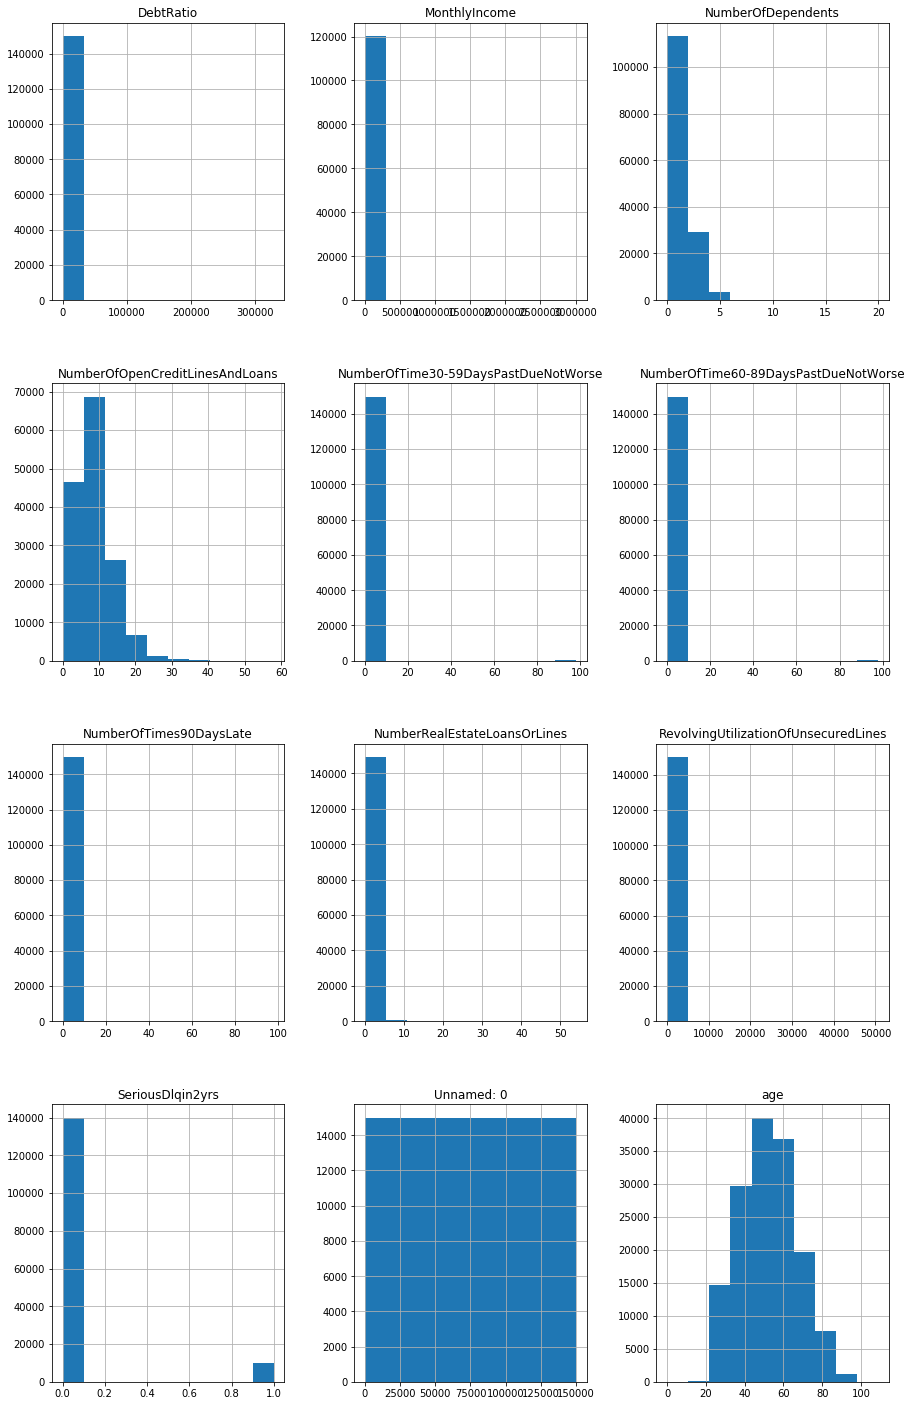

In [10]:
# histogramme
df_train_full.hist(figsize=(15,25))
pyplot.show()

In [11]:
# 
from sklearn.preprocessing import StandardScaler 
from numpy import set_printoptions 
 
array = df_train_full.values 
# separate array into input and output components
X = array[:,0:8] 
Y = array[:,8] 
scaler = StandardScaler().fit(X) 
rescaledX = scaler.transform(X) 
# summarize transformed data 
set_printoptions(precision=3) 
print(rescaledX[0:5,:])

[[-1.732 -0.021 -0.494  0.377 -0.173  0.17   0.884 -0.064]
 [-1.732 -0.02  -0.832 -0.1   -0.173 -0.283 -0.865 -0.064]
 [-1.732 -0.022 -0.968  0.138 -0.173 -0.252 -1.254  0.176]
 [-1.732 -0.023 -1.509 -0.1   -0.173 -0.234 -0.671 -0.064]
 [-1.732 -0.021 -0.223  0.138 -0.173  3.957 -0.282 -0.064]]


### Changement des valeurs nan de la colonne 'NumberOfDependents' en 0

In [12]:
# utilisation de fillna pour changer toutes les valeurs nan d'une colonne en 0

df_train_full['NumberOfDependents'] = df_train_full.fillna(0)
df_test['NumberOfDependents'] = df_test.fillna(0)

In [13]:
# agrégation de 3 colonnes grâce à insert

df_train_full.insert( 6, 'NumberOfTimes30DaysOrLater', df_train_full['NumberOfTime30-59DaysPastDueNotWorse'] + 2*df_train_full['NumberOfTime60-89DaysPastDueNotWorse'] + 3*df_train_full['NumberOfTimes90DaysLate'])
df_test.insert( 6, 'NumberOfTimes30DaysOrLater', df_test['NumberOfTime30-59DaysPastDueNotWorse'] + 2*df_test['NumberOfTime60-89DaysPastDueNotWorse'] + 3*df_test['NumberOfTimes90DaysLate'])

### Suppression des trois colonnes ayant servies à l'agrégation

In [14]:
# suppression de colonnes grâce à del

del df_train_full['NumberOfTime30-59DaysPastDueNotWorse']
del df_train_full['NumberOfTimes90DaysLate']
del df_train_full['NumberOfTime60-89DaysPastDueNotWorse']

del df_test['NumberOfTime30-59DaysPastDueNotWorse']
del df_test['NumberOfTimes90DaysLate']
del df_test['NumberOfTime60-89DaysPastDueNotWorse']

### Insertion de la colonne 'IsOld'

In [15]:
# création de colonne

df_train_full.insert( 3, 'IsOld', 0)

df_test.insert( 3, 'IsOld', 0)

In [16]:
#suppression des valeurs anomalies

df_train_full.loc[df_train_full['NumberOfOpenCreditLinesAndLoans'] == 0,'NumberOfTimes30DaysOrLater'] = 0

df_test.loc[df_train_full['NumberOfOpenCreditLinesAndLoans'] == 0,'NumberOfTimes30DaysOrLater'] = 0

In [17]:
# renomme la colonne 0

myList = list(df_train_full.columns)
myList[0] = 'Id'
df_train_full.columns = myList

myList = list(df_test.columns)
myList[0] = 'Id'
df_test.columns = myList

### création de la fonction qui apporte toutes les modifications vues précédement

In [18]:
def modification_df(df):
    df['NumberOfDependents'] = df.fillna(0)
    df.insert( 6, 'NumberOfTimes30DaysOrLater', df['NumberOfTime30-59DaysPastDueNotWorse'] + 2*df['NumberOfTime60-89DaysPastDueNotWorse'] + 3*df['NumberOfTimes90DaysLate'])
    
    df.loc[df['NumberOfOpenCreditLinesAndLoans'] == 0,'NumberOfTimes30DaysOrLater'] = 0
    
    del df['NumberOfTime30-59DaysPastDueNotWorse']
    del df['NumberOfTimes90DaysLate']
    del df['NumberOfTime60-89DaysPastDueNotWorse']

#     df.insert( 3, 'IsOld', 0)

    myList = list(df.columns)
    myList[0] = 'Id'
    df.columns = myList
    
    df = df.fillna('NA')
    
    return df

### Vérification

In [19]:
# affichage de vérifcation

df_train_full

,Id,RevolvingUtilizationOfUnsecuredLines,age,IsOld,DebtRatio,MonthlyIncome,NumberOfTimes30DaysOrLater,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,SeriousDlqin2yrs
0,1,0.766127,45,0,0.802982,9120.0,2,13,6,1.0,1
1,2,0.957151,40,0,0.121876,2600.0,0,4,0,2.0,0
2,3,0.658180,38,0,0.085113,3042.0,4,2,0,3.0,0
3,4,0.233810,30,0,0.036050,3300.0,0,5,0,4.0,0
4,5,0.907239,49,0,0.024926,63588.0,1,7,1,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0.040674,74,0,0.225131,2100.0,0,4,1,149996.0,0
149996,149997,0.299745,44,0,0.716562,5584.0,0,4,1,149997.0,0
149997,149998,0.246044,58,0,3870.000000,NaN,0,18,1,149998.0,0
149998,149999,0.000000,30,0,0.000000,5716.0,0,4,0,149999.0,0


### Création de csv contenant les fichiers modifiés

In [20]:
df_train_full.to_csv('train_full.csv')
df_test.to_csv('test.csv')